# _Random walks_ : una aproximación al movimiento browniano.

### **_Random walks_**: ¿porqué pueden describir al movimiento browniano?

Las **_caminatas aleatorias_** o **_random walks_** son procesos que describen cuerpos que se desplazan de una forma aleatoria, llegando hasta un punto final determinado por su caminata. 

Pero, ¡ojo!, hemos mencionado un concepto _fundamental_ para este proceso, que el recorrido del cuerpo es **aleatorio**. Y cuando hablamos de cosas aleatorias, hablamos de **_probabilidad_**.

#### ¿Qué son los números aleatorios?

La **_aleatoriedad_** es aquella incertidumbre de **no** saber cuál será el resultado antes de que suceda el evento. Esto es muy importante para el _movimiento browniano_ puesto que muchas veces las partículas se mueven de forma impredecible, pero de esto más a continuación.

Pero incluso aunque queramos hablar de _números aleatorios_ tenemos que introducir más conceptos de probabilidad.

##### Variables aleatorias y conceptos generales de probabilidad

Estos conceptos son muy simples de entender; por ejemplo, una **_variable estadística_** es un conjunto de atributos de un objeto, atributos como color, forma, material, entre muchas otras cosas; de esta forma, podemos juntar los conceptos de _variable estadística_ y _aleatoriedad_ para hacer un nuevo concepto, ¡la **_variable aleatoria_**! 

Una **_variable aleatoria_** es aquella variable, es decir, conjunto de atributos, que están sujetos a un cambio que no se puede predecir hasta que sucede, así se entiende que el cambio en sus atributos es totalmente aleatorio. Pero ahora nos encontramos con otra situación, ¡existen varios tipos de variables aleatorias! Pero también son fáciles de explicar, veamos.

* Variable aleatoria **_discreta_**. Es aquella variable que sólo puede tomar un número finito de valores, es decir, sólo tiene a su diposición una cantidad limitada bajo la cual pueden sufrir cambios sus atributos a los que hace referencia.
* Variable aleatoria **_continua_**. Es lo contrario a la discreta (qué fácil, ¿no?). Aquí, la variable puede tomar un número infinito de valores bajo los cuales puede suceder un cambio en los atributos a los que hace referencia.

Sólo nos faltan unos cuantos concepto más y ya casi estamos listos para explicar los _números aleatorios_. Necesitamos introducir la **_distribución de probabilidad_** son valores que nos dicen qué chance tenemos de obtener un resultado deseado de un evento o experimento. Un ejemplo muy fácil es el siguiente: se debe imaginar que se tiene una moneda con dos caras, entonces, sólo hay dos posibles resultados del _evento_ de _lanzar una moneda_, o nos cae una cara (águila) o la otra (sol). Por lo tanto, la _distribución de probabilidad_ de este evento son los valores $0.5$ y $0.5$, puesto que sólo hay dos posibles opciones (águila o sol) y sólo nos puede salir una opción al mismo tiempo, es decir, $\frac{1}{2}$.

Por último, tenemos la **_función de densidad de probabilidad_** (FDP), y esta función es muy simple de entender, es la que se encarga de "repartir" las probabilidades de un evento dadas por la _distribución de probabilidad_.

¡Listo! Ahora estamos listos para saber que es un _número aleatorio_. Dada una distribución de probabilidad, un **_número aleatorio_** se escoge mediante una función de densidad de probabilidad que siga a la distribución dada de tal forma que, si se generaran muchos números aleatorios, formase la distribución de probabilidad escogida en un inicio.

## Random walks y su interpretación matemática

Una forma simple de generar una caminata aleatoria es mediante generar movimientos aleatorios a un cuerpo. Es decir, darle una posición inicial al cuerpo, decirle hacia donde se puede mover, esto es, restringir sus movimientos hacia arriba, abajo, derecha o izquierda y luego generar estos números aleatoriamente. Claro que esta aproximación requiere de variables aleatorias y distribuciones de probabilidad, pero podemos visualizar una _caminata aleatoria_ de la siguiente forma.



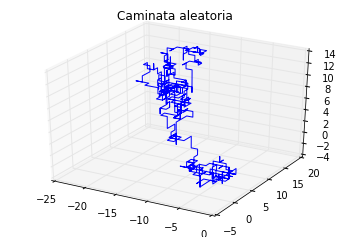

In [2]:
%matplotlib inline
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random
import numpy as np

# Tamaño de fuente para la gráfica
mpl.rcParams['legend.fontsize'] = 10

# Definir una gráfica de tipo 3D
fig = plt.figure()
ax = fig.gca(projection='3d')

xyz = []
cur = [0, 0, 0]

# Iterar sobre 6 posiciones aleatoriamente
for _ in xrange(500):
    axis = random.randrange(0, 3)
    cur[axis] += random.choice([-1, 1])
    xyz.append(cur[:])

# Graficar los puntos obtenidos
x, y, z = zip(*xyz)
ax.plot(x, y, z)
ax.legend()
plt.title('Caminata aleatoria')
plt.show()

Otra forma de ver las caminatas aleatorias es mediante la _distribución de Rayleigh_, pero para esto, uno se debe familiarizar uno con la **_distribución normal_**. Esta es una distribución muy famosa acreditada a Karl Gauss y la cual aparece en todos los libros de texto porque es una distribución muy importante para los procesos de la vida cotidiana. La FDP de la distribución normal está dada por $$f\left(x\ \vert\ \mu,\sigma^2\right) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left({- \frac{(x - \mu)^2}{2\sigma^2}}\right)$$

Entonces, una _caminata aleatoria_ está dada por la FDP de la **_distribución de Rayleigh_** acreditada a Lord Rayleigh y la cual está basada en la _distribución normal_, el hecho es que esta nueva distribución de Rayleigh toma en cuenta ahora la probabilidad de moverse al rededor del espacio, y por eso se tiene la $n$ en la FDP. La FDP se ve de la siguiente forma. $$ f\left(r_n\right) = \frac{r_n}{n \sigma^2} \exp\left(-\frac{r_n^2}{2n \sigma^2}\right) $$

### ¿Cómo se ven las caminatas aleatorias?

Algunas de estas FDP (distribución de Rayleigh) pueden ser graficadas dado un número limitado de pasos, partículas y posiciones, como se ve a continuación.

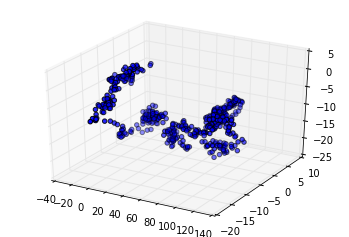

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def rayleigh(x0, n, dt, delta):

    x0 = np.asfarray(x0)
    shp = (n+1,) + x0.shape
    
    # Utilizar distribución normal como "plantilla" para generar la de Rayleigh
    r = np.random.normal(size=shp, scale=delta*np.sqrt(dt))

    r[0] = 0.0

    x = r.cumsum(axis=0)
    x += x0

    return x

xinicial = np.zeros(1)  # número de partículas
n = 500
dt = 10.0
delta = 0.25
xini = np.array(rayleigh(xinicial, n, dt, delta))
yini = np.array(rayleigh(xinicial, n, dt, 0.25))
zini = np.array(rayleigh(xinicial, n, dt, 0.2))

# *--- Plot en 3D ---*

# Crear mapa de colores
number = 1             # número de color por partícula
cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, number)]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i, color in enumerate(colors, start=1):
    xini = np.array(rayleigh(xinicial, n, dt, i))
    ax.scatter(xini, yini, zini, color=color)

plt.show()

## Representación matemática del movimiento browniano

Muchos matemáticos intentaron describir y darle solución al movimiento browniano y el comportamiento de los gases dentro de contenedores, ¿porqué se mueven así? ¿Porqué tienen patrones muy similares? No fue hasta que Einstein trató de darle solución a este problema, y luego corroborarse mediante el trabajo de Perrin.

Einstein lo también lo vio desde la perspectiva de la probabilidad, pero desde un punto de vista de la difusión de la concentración de una sustancia dentro de un contenedor. Einstein imaginó que la sustancia iba a cambiar de posición de acuerdo a la proporción de concentración molar con respecto a un volumen, entonces, quiso determinar la posición de estas partículas (llamadas _partículas brownianas_) mediante su _desplazamiento cuadrático medio_, hizo todo los cálculos necesarios para llegar a la forma $$ \rho\left(x,t\right) = \frac{N}{\sqrt{4 \pi D t}} \exp\left(- \frac{x^2}{4Dt}\right) $$

Esta FDP se puede simplificar mediante el uso del proceso de Wiener, descrito con la forma $$ f_{W_t}\left(x\right) = \frac{1}{\sqrt{2 \pi t}} \exp{- \frac{x^2}{2t}} ,$$ que se puede ver en el código siguiente.

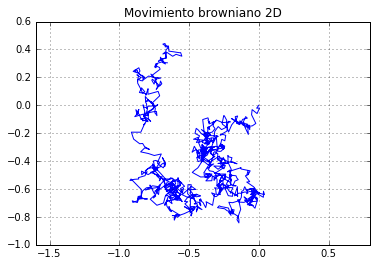

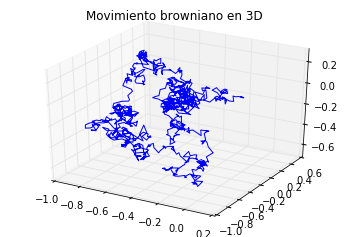

In [4]:
%matplotlib inline
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def brownian(x0, n, dt, delta, out=None):
    x0 = np.asarray(x0)
    r = norm.rvs(size=x0.shape + (n,), scale=delta*np.sqrt(dt))
    if out is None:
        out = np.empty(r.shape)
    
    np.cumsum(r, axis=1, out=out)
    out += np.expand_dims(x0, axis=-1)
    
    return out

def main():
    
    delta = 0.25
    T = 10.0
    N = 1000
    dt = T/N
    x = np.empty((3,N+1))
    x[:, 0] = np.zeros(3)
    
    for _ in xrange(500):
        brownian(x[:, 0], N, dt, delta, out=x[:,1:])
    
    #plot in 2D
    plt.plot(x[0], x[1])
    plt.title('Movimiento browniano 2D')
    plt.axis('equal')
    plt.grid(True)
    plt.show()  
    
    #plot in 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x[0], x[1],x[2])
    plt.title('Movimiento browniano en 3D')
    
    
if __name__ == "__main__":
    main()

## Conclusiones

El movimiento browniano es un fenómeno físico que no debe de ser tomado a la ligera. Mucho de lo que sucede para que este fenómeno aparezca tiene que ver con temas avanzados de _mecánica estadística_, la rama de la física que describe el comportamiento de la _termodinámica_. Si bien podemos llegar a buenas aproximaciones mediante el uso de _random walks_, el movimiento browniano requiere de muchas consideraciones físicas, como _temperatura_, _volumen_, _entropía_ y _energía interna_ del sistema estudiado. Este fenómeno ha sido estudiado por muchas de las mentes más brillantes de la física y aún así existen preguntas sin responder, pero al menos tenemos una herramienta para poder ver estos comportamientos mediante una simulación por computadora.